# Ambiente

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Carregamento dos Dados

In [139]:
# Carregar o dataset enviado
df = pd.read_csv('https://viagens-ml.s3.sa-east-1.amazonaws.com/dataset_viagens_brasil.csv')

In [140]:
df.head()

,Idade,Cidade_Origem,Custo_Desejado,Prefere_Praia,Prefere_Natureza,Prefere_Cultura,Prefere_Festas,Prefere_Gastronomia,Prefere_Compras,Cidade_Destino
0,23.0,Campo Grande,9000.0,4,3.0,1,5.0,1.0,3,Porto Seguro
1,33.0,Rio Branco,NaN,4,5.0,3,5.0,5.0,5,Balneário Camboriú
2,46.0,Rio Branco,2900.0,5,4.0,5,4.0,2.0,2,Porto Seguro
3,20.0,São Luís,2900.0,5,3.0,4,3.0,5.0,4,Porto Seguro
4,37.0,Teresina,1700.0,3,3.0,4,2.0,1.0,1,Fernando de Noronha


In [141]:
# Tipos Antes de Tratamento de Valores Sabotados
print(df.dtypes)

Idade                  float64
Cidade_Origem           object
Custo_Desejado         float64
Prefere_Praia           object
Prefere_Natureza       float64
Prefere_Cultura         object
Prefere_Festas         float64
Prefere_Gastronomia    float64
Prefere_Compras         object
Cidade_Destino          object
dtype: object


In [142]:
print("Valores nulos por coluna:")
print(df.isnull().sum())

Valores nulos por coluna:
Idade                  497
Cidade_Origem            0
Custo_Desejado         497
Prefere_Praia            0
Prefere_Natureza       400
Prefere_Cultura          0
Prefere_Festas         400
Prefere_Gastronomia    400
Prefere_Compras          0
Cidade_Destino           0
dtype: int64


## Tratamento de Dados Nulos

In [144]:
def fillna_by_target(df, column, method='mean'):
    # Filtra os registros com dados nulos na coluna especificada
    null_values = df[df[column].isnull()]

    # Cria uma dataframe vazio para concatenar os dados tratados
    null_values_filled = pd.DataFrame()
    
    for city in df['Cidade_Destino'].unique():
        # Filtra os dados da cidade com base no df base
        df_city_data = df[df['Cidade_Destino'] == city]
    
        # Calcula a média da coluna para a cidade
        fill_value = 0
        if method == 'mean':
            fill_value = int(df_city_data[column].mean())
        elif method == 'mode':
            fill_value = df_city_data[column].mode()
    
        # Filtra os dados da cidade com base no df de dados nulos
        null_values_city_data = null_values[null_values['Cidade_Destino'] == city]
    
        # Faz o preenchimento dos dados nulos com a média
        null_values_city_data[column].fillna(fill_value, inplace=True)
    
        # Concatena os dados tratados em um dataframe separado
        null_values_filled = pd.concat([null_values_filled, null_values_city_data], axis=0)

    # Remove do df base os registros com dados nulos
    df.drop(null_values.index, axis=0, inplace=True)
    
    # Adiciona ao df base os registros com os dados tratados
    df = pd.concat([df, null_values_filled], axis=0)   

In [145]:
fillna_by_target(df, 'Idade', 'mean')

/tmp/ipykernel_91460/1360394119.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  null_values_city_data[column].fillna(fill_value, inplace=True)
/tmp/ipykernel_91460/1360394119.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_values_city_data[column].fillna(fill_value, inplace=True)


In [146]:
fillna_by_target(df, 'Custo_Desejado', 'mean')

/tmp/ipykernel_91460/1360394119.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  null_values_city_data[column].fillna(fill_value, inplace=True)
/tmp/ipykernel_91460/1360394119.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_values_city_data[column].fillna(fill_value, inplace=True)


In [147]:
fillna_by_target(df, 'Prefere_Natureza', 'mode')

/tmp/ipykernel_91460/1360394119.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  null_values_city_data[column].fillna(fill_value, inplace=True)
/tmp/ipykernel_91460/1360394119.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_values_city_data[column].fillna(fill_value, inplace=True)


In [148]:
fillna_by_target(df, 'Prefere_Festas', 'mode')

/tmp/ipykernel_91460/1360394119.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  null_values_city_data[column].fillna(fill_value, inplace=True)
/tmp/ipykernel_91460/1360394119.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_values_city_data[column].fillna(fill_value, inplace=True)


In [149]:
fillna_by_target(df, 'Prefere_Gastronomia', 'mode')

/tmp/ipykernel_91460/1360394119.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  null_values_city_data[column].fillna(fill_value, inplace=True)
/tmp/ipykernel_91460/1360394119.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_values_city_data[column].fillna(fill_value, inplace=True)


In [150]:
df.isnull().sum()

Idade                  0
Cidade_Origem          0
Custo_Desejado         0
Prefere_Praia          0
Prefere_Natureza       0
Prefere_Cultura        0
Prefere_Festas         0
Prefere_Gastronomia    0
Prefere_Compras        0
Cidade_Destino         0
dtype: int64

# Tratamento de Valores Sabotados

In [151]:
for col in df.columns:
    print(f"Valores únicos em '{col}':")
    print(df[col].unique())
    print("----")

Valores únicos em 'Idade':
[ 23.  46.  20.  37.  53.  36.  43.  24.  50.  57.  56.  35. 190.  28.
  45.  42.  67.  40.  48.  47.  59.  52.  65.  69.  66.  19.  18.  29.
  54.  49.  26.  58.  33.  41.  25.  55.  63.  21.  31.  38.  34.  39.
  62.  44.  22.  61.  70.  64.  60.  30.  68.  32.  51.  27.]
----
Valores únicos em 'Cidade_Origem':
['Campo Grande' 'Rio Branco' 'São Luís' 'Teresina' 'João Pessoa' 'Maceió'
 'Recife' 'Vitória' 'Porto Velho' 'Aracaju' 'Natal' 'Cuiabá' 'Fortaleza'
 'Florianópolis' 'Belém' 'Brasília' 'Goiânia' 'Boa Vista' 'Curitiba'
 'Rio de Janeiro' 'Macapá' 'Manaus' 'Porto Alegre' 'Palmas' 'Salvador'
 'São Paulo' 'Belo Horizonte']
----
Valores únicos em 'Custo_Desejado':
[  9000.   2900.   1700.   7100.   2200.   5200.   4400.   3500.   3100.
   9400.  10300.   2800.   4900.   2500.   9600.   5800.   3400.  15200.
   3200.   1300.   5100. 400000.   7000.   3000.  11000.  11900.   2700.
   3800.   5400.   6200.  12100.   4000.   5300.   5700.   2400.   1200.
   2600

### Tratamento de Valores Sabotados nas Colunas `Prefere_`

In [152]:
# Gera a lista de colunas que começam com "Prefere_"
cols_prefere = [col for col in df.columns if col.startswith("Prefere_")]

for col in cols_prefere:
    # substitui "cinco" por 5 e "erro" por NaN
    df[col] = df[col].replace({'cinco': '5', 'erro': np.nan})

    # Converte para numérico (garante que '1', '2'... virem inteiros)
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Preenche NaNs com a mediana da coluna
    df[col] = df[col].fillna(df[col].median())

    # Converte para inteiro
    df[col] = df[col].astype('int32')

    # Mostra tipo final e valores únicos
    print(f"{col}: {df[col].dtype}, valores únicos: {df[col].unique()}")

Prefere_Praia: int32, valores únicos: [4 5 3 2 1]
Prefere_Natureza: int32, valores únicos: [3 4 1 2 5]
Prefere_Cultura: int32, valores únicos: [1 5 4 2 3]
Prefere_Festas: int32, valores únicos: [5 4 3 2 1]
Prefere_Gastronomia: int32, valores únicos: [1 2 5 4 3]
Prefere_Compras: int32, valores únicos: [3 2 4 1 5]


# Tratamento de Outliers

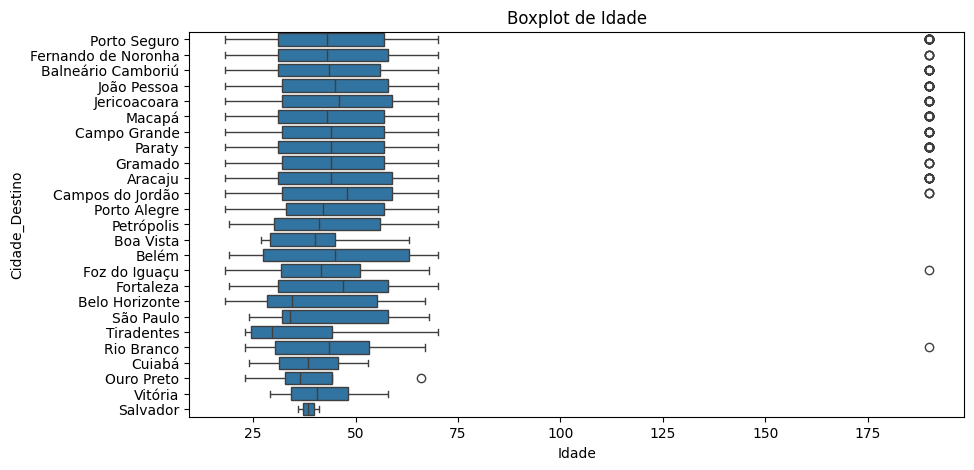

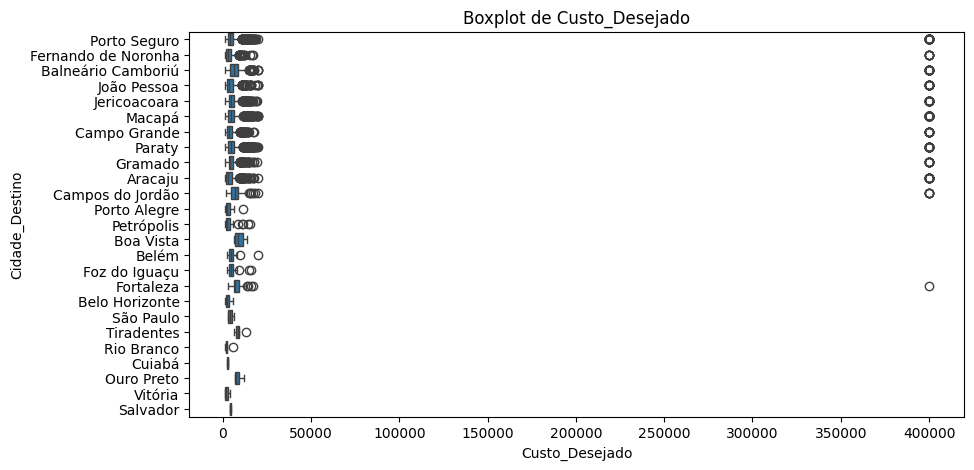

In [154]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=df[col], y='Cidade_Destino')
    plt.title(f"Boxplot de {col}")
    plt.show()

In [155]:
def lim_sup(data):
    # 1. Calcula Q1 e Q3
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # 2. Calcula o IQR
    IQR = Q3 - Q1

    # 3. Calcula o Limite Superior
    return Q3 + 1.5 * IQR

In [156]:
def handle_outliers_by_target(df, column, hard_lim_sup: float=None):
    # Cria uma dataframe vazio para concatenar os dados tratados
    outliers_filled = pd.DataFrame()
    for city in df['Cidade_Destino'].unique():
        # Filtra os dados da cidade com base no df base
        df_city_data = df[df['Cidade_Destino'] == city]

        outliers = None
        # Filtra os registros com dados nulos na coluna especificada
        if hard_lim_sup != None:
            outliers = df_city_data[df_city_data[column] > hard_lim_sup]
        else:
            outliers = df_city_data[df_city_data[column] > lim_sup(df_city_data[column])]

        df_city_data.drop(outliers.index, axis=0, inplace=True)
    
        # Calcula a média da coluna para a cidade
        fill_value = fill_value = int(df_city_data[column].mean())
    
        # Filtra os dados da cidade com base no df de dados nulos
        outliers_city_data = outliers[outliers['Cidade_Destino'] == city]
    
        # Faz o preenchimento dos dados nulos com a média
        outliers_city_data[column].fillna(fill_value, inplace=True)
    
        # Concatena os dados tratados em um dataframe separado
        outliers_filled = pd.concat([outliers_filled, outliers_city_data], axis=0)

        # Remove do df base os registros com dados nulos
        df.drop(outliers.index, axis=0, inplace=True)
    
    # Adiciona ao df base os registros com os dados tratados
    df = pd.concat([df, outliers_filled], axis=0)   

In [157]:
handle_outliers_by_target(df, 'Idade')

/tmp/ipykernel_91460/2490044883.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_data.drop(outliers.index, axis=0, inplace=True)
/tmp/ipykernel_91460/2490044883.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  outliers_city_data[column].fillna(fill_value, inplace=True)


In [158]:
handle_outliers_by_target(df, 'Custo_Desejado', 50000)

/tmp/ipykernel_91460/2490044883.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_data.drop(outliers.index, axis=0, inplace=True)
/tmp/ipykernel_91460/2490044883.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  outliers_city_data[column].fillna(fill_value, inplace=True)


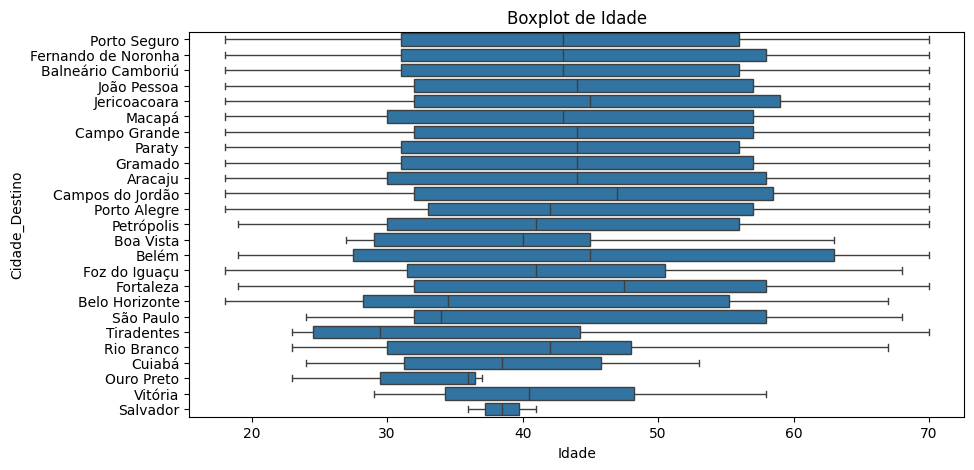

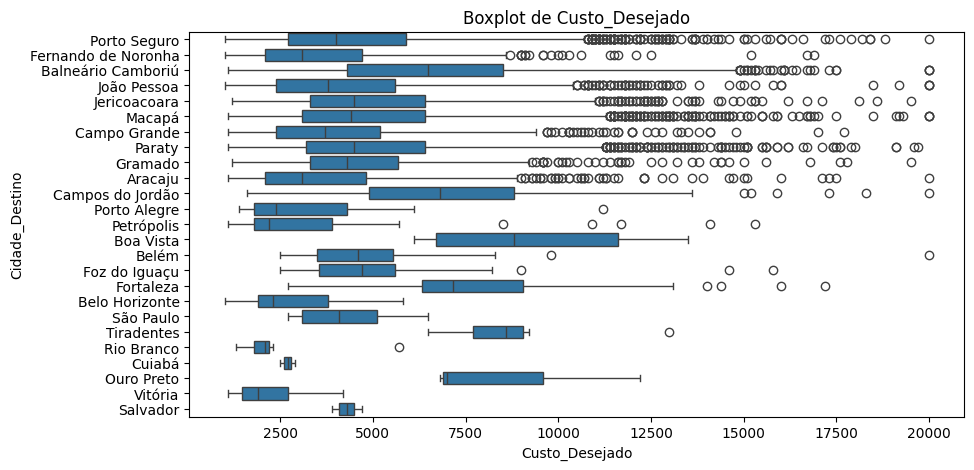

In [159]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=df[col], y='Cidade_Destino')
    plt.title(f"Boxplot de {col}")
    plt.show()

### Tratamento das Classes Alvo

In [163]:
for city in df['Cidade_Destino'].unique():
    city_data = df[df['Cidade_Destino'] == city]
    rows = city_data.shape[0]
    if rows < 100:
        city_data['Cidade_Destino'] = ['Outros Destino'] * rows
        df.drop(city_data.index, axis=0, inplace=True)
        df = pd.concat([df, city_data], axis=0)


/tmp/ipykernel_91460/1047740698.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Cidade_Destino'] = ['Outros Destino'] * rows


In [164]:
df['Cidade_Destino'].value_counts()

Cidade_Destino
Macapá                 3418
Porto Seguro           3026
Paraty                 2580
Balneário Camboriú     1703
João Pessoa            1537
Jericoacoara           1452
Aracaju                1244
Campo Grande            854
Gramado                 550
Fernando de Noronha     425
Outros Destino          365
Campos do Jordão        339
Name: count, dtype: int64

### BALANCEAMENTO DA CLASSE ALVO

## Label encoder

In [ ]:
label_encoder = LabelEncoder()

df['Cidade_Destino'] = label_encoder.fit_transform(df['Cidade_Destino'])
cidades_originais = label_encoder.inverse_transform(df['Cidade_Destino'])